In [75]:
# from transformers import LlamaTokenizerFast, BertTokenizerFast, AutoTokenizer
# from tqdm import tqdm
# from datasets import load_dataset

# tokenizer_llama = LlamaTokenizerFast.from_pretrained("hf-internal-testing/llama-tokenizer")
# tokenizer_bloom = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
# tokenizer_Bert = BertTokenizerFast.from_pretrained("google-bert/bert-base-uncased")


In [76]:
import os
import pandas as pd
import re

# Define the folder path
path = './llm_outputs/llama3_405B'

# List all .tsv files in the folder
tsv_files = [f for f in os.listdir(path) if f.endswith('.tsv')]

# Dictionary to store the DataFrame of accuracies for each file
file_subject_accuracies = {}

# Process each TSV file
for tsv_file in tsv_files:
    file_path = os.path.join(path, tsv_file)
    try:
        # Read the TSV file with error handling
        data = pd.read_csv(file_path, sep='\t', on_bad_lines='warn')
        
        # Ensure the data contains the required columns
        expected_columns = ['question', 'choices', 'answer', 'subject', 'llm']
        if not all(col in data.columns for col in expected_columns):
            print(f"Skipping {tsv_file} due to missing columns.")
            continue

        # Initialize an empty list to hold accuracy values for each record
        accuracy_records = []

        # Check if the `answer` is in the `llm` column for each row
        for _, row in data.iterrows():
            # Use regex to extract only the letter part (A, B, C, etc.) from the llm column
            llm_answers = [match.group(1) for match in re.finditer(r'([A-Za-z])\)', str(row['llm']))]

            # Check if the answer exists in the llm choices (only comparing the letter part)
            is_correct = 1 if row['answer'].strip() in llm_answers else 0
            accuracy_records.append(is_correct)
        
        # Add the accuracy as a new column to the DataFrame
        data['accuracy'] = accuracy_records

        # Store the updated DataFrame in the dictionary
        file_subject_accuracies[tsv_file] = data

        # Save the DataFrame with accuracy to a CSV file named after the language (file name without extension)
        language_name = os.path.splitext(tsv_file)[0]  # Remove '.tsv' extension
        save_path = os.path.join(path, f"{language_name}_accuracy.csv")
        data.to_csv(save_path, index=False)
    
    except Exception as e:
        print(f"Error processing {tsv_file}: {e}")


In [69]:
import os

# Define the folder path where files are saved
path = './llm_outputs/llama3_405B'

# List all files ending with "_accuracy.csv"
created_files = [f for f in os.listdir(path) if f.endswith('_accuracy.csv')]

# Print the list of created files
print("List of accuracy files created:")
for file in created_files:
    print(file)


List of accuracy files created:
amh_accuracy.csv
twi_accuracy.csv
hau_accuracy.csv
xho_accuracy.csv
zul_accuracy.csv
lin_accuracy.csv
sna_accuracy.csv
kin_accuracy.csv
ewe_accuracy.csv
orm_accuracy.csv
lug_accuracy.csv
yor_accuracy.csv
wol_accuracy.csv
ibo_accuracy.csv
swa_accuracy.csv
eng_accuracy.csv
fra_accuracy.csv
sot_accuracy.csv


In [126]:
# List all the accuracy CSV files
accuracy_files = [f for f in os.listdir(path) if f.endswith('_accuracy.csv')]

# Initialize a list to hold individual DataFrames
dfs = []

# Loop through each CSV file and load it into a DataFrame
for accuracy_file in accuracy_files:
    file_path = os.path.join(path, accuracy_file)
    try:
        # Load the CSV into a DataFrame
        df = pd.read_csv(file_path)
        
        # Add a column to the DataFrame for the file name (language)
        df['language'] = accuracy_file.replace('_accuracy.csv', '')  # Remove '_accuracy.csv' to get the language name
        
        # Add the DataFrame to the list
        dfs.append(df)
    except Exception as e:
        print(f"Error loading {accuracy_file}: {e}")

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True).drop(columns=["Unnamed: 0"])

# Display the resulting DataFrame
(combined_df)


,question,choices,answer,subject,llm,accuracy,language
0,በ 24 = 2p ውስጥ የ p ዋጋ ስንት ነው,"['p = 5', 'p = 9', 'p = 13', 'p = 25']",C,elementary_mathematics,በ 24 = 2p \n\nበ 24 = 2 * 12 \n\nበ 24 / 2 = 12 ...,0,amh
1,ወይዘሮ ፔሬዝ በ5 ቀናት ውስጥ በአጠቃላይ 40 ማይል ነድታለች። በየቀኑ ...,"['5', '7', '8', '9']",C,elementary_mathematics,C) 8,1,amh
2,የ −40 ÷ (−8) ድርሻ ፈልጉ,"['1 ሲካፈል 5', '-5', '−1 ሲካፈል 5', '5']",D,elementary_mathematics,D) 5,1,amh
3,የእግር ኳስ ቡድን የእግር ኳስ ኳሶችን ለመግዛት $90.00 አለው። አንድ...,"['4', '5', '6', '7']",B,elementary_mathematics,B) 5,1,amh
4,አንተ እና ሶስት ጓደኞች ወደ ኮንሰርት ሄዳችሁ። የአራት ትኬቶች አጠቃላይ...,"['4t = 112; $449', '4t = 112; $29', 't over 4 ...",B,elementary_mathematics,B) 4t = 112; $28,1,amh
...,...,...,...,...,...,...,...
8995,Ho fokotswa ha meputso e fokolang tlhahisong y...,['sehlahiswa se tlwaelehileng sa mosebetsi se ...,D,high_school_microeconomics,B) Kakaretso ya ho etsa sehlahiswa e qala ho wa,0,sot
8996,Seo o se telang ho tswellisa tsela e nngwe e b...,"['tjhelete.', 'lefatshe', 'ditjeho tsa tjhelet...",D,high_school_microeconomics,D) ditjeho tsa monyetla,1,sot
8997,Ke efe ho tse latelang e senang tshobotsi ya i...,"['Ho kena mahala indastering.', 'Product diffe...",B,high_school_microeconomics,D) dihlahiswa tse tshwanang,0,sot
8998,E amana le mmaraka wa basebetsi o nang le more...,"['e lefa hanyane mme e hira haholo', 'e lefa h...",D,high_school_microeconomics,A) e lefa hanyane mme e hira haholo,0,sot


In [127]:
combined_df.to_csv("results_llama.csv")

In [128]:

# Fertility scores by language (Used the LLama Tokenizer)
fertility_scores = {
    "amh": 11.52529601722282,
    "eng": 1.475627916211655,
    "ewe": 2.970092121314096,
    "fra": 1.8337786826144125,
    "hau": 2.550557802569003,
    "ibo": 2.965458006406983,
    "kin": 3.2254943652987453,
    "lin": 2.0521419207510467,
    "lug": 3.521403576051004,
    "orm": 3.381484265922028,
    "sna": 3.419693445458341,
    "sot": 2.2515918230563003,
    "swa": 2.5851301823028225,
    "twi": 2.542355665705115,
    "wol": 2.289836977847537,
    "xho": 3.9811791689152725,
    "yor": 3.638583532478818,
    "zul": 3.8692230743581195,
}


# Map fertility scores to the DataFrame
combined_df["fertility"] = combined_df["language"].map(fertility_scores)

# Aggregate to calculate mean accuracy by language and subject
agg_df = combined_df.groupby(["language", "subject"]).agg(
    accuracy_mean=("accuracy", "mean"),
    fertility=("fertility", "first")
).reset_index()


<Figure size 1000x600 with 0 Axes>

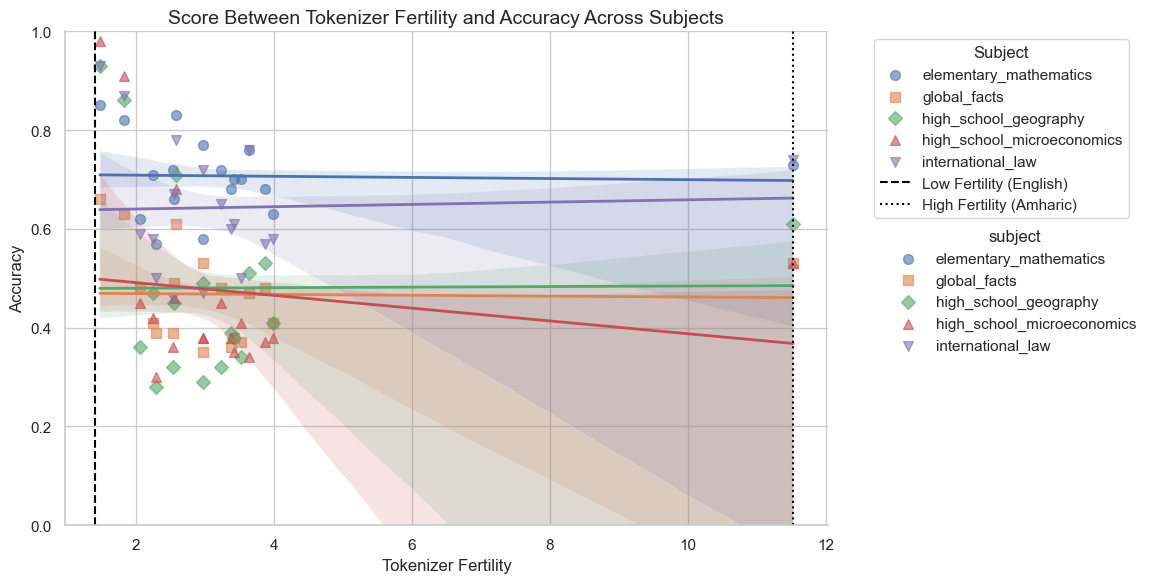

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# First, calculate the mean accuracy for each combination of language, subject
agg_df = combined_df.groupby(["language", "subject"]).agg({
    "accuracy": "mean",
    "fertility": "first"  # Take the first fertility value since it's constant per language
}).reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create the scatterplot with regression lines for each subject
g = sns.lmplot(
    data=agg_df,
    x="fertility",
    y="accuracy",  # Now using the non-aggregated accuracy values
    hue="subject",
    height=6,
    aspect=1.5,
    scatter_kws={"s": 50, "alpha": 0.6},  # Added some transparency
    line_kws={"linewidth": 2},
    markers=["o", "s", "D", "^", "v"],
    ci=68
)

# Set y-axis limits
g.ax.set_ylim(0, 1)

# Add staggered vertical lines for better readability
plt.axvline(x=1.4, color="black", linestyle="--", label="Low Fertility (English)")
plt.axvline(x=11.52, color="black", linestyle=":", label="High Fertility (Amharic)")

# Add labels and title
plt.title("Score Between Tokenizer Fertility and Accuracy Across Subjects", fontsize=14)
plt.xlabel("Tokenizer Fertility", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Adjust legend
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()